This is just a WIP script to visualized computed results.

In [1]:
# dependencies

from src.data_analysis.query_accuracy import query_accuracy
import matplotlib.pyplot as plt
import glob
from copy import copy
import numpy as np
import cv2
from mpl_toolkits.axes_grid1 import ImageGrid


%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 4]
plt.style.use("bmh")

In [2]:
# show a face from each condition
def show_faces_of_condition(
    condition: str, suffixes: list, grid_size: tuple, figsize: tuple = (6, 8)
):
    potential_faces = glob.glob("Datasets//lfw//**//*.jpg", recursive=True)
    face_real_path = potential_faces[np.random.randint(len(potential_faces))]

    face_images = []

    for suffix in suffixes:
        dataset_name = f"lfw_{condition}_{suffix}"
        current_path = face_real_path.replace(
            "Datasets//lfw", f"Anonymized Datasets//{dataset_name}"
        )

        face_img = cv2.imread(current_path)
        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
        face_images.append(face_img)

    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(
        fig,
        111,  # similar to subplot(111)
        nrows_ncols=grid_size,  # creates 2x2 grid of axes
        axes_pad=0.1,  # pad between axes in inch.
    )

    while len(face_images) < grid_size[0] * grid_size[1]:
        face_images.append(np.zeros_like(face_images[0]))
        suffixes.append(-1)

    for i, (ax, im) in enumerate(zip(grid, face_images)):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.text(10, 30, suffixes[i], color="b")
        ax.set_xticks([])
        ax.set_yticks([])

    grid[0].set_title(condition)
    plt.show()

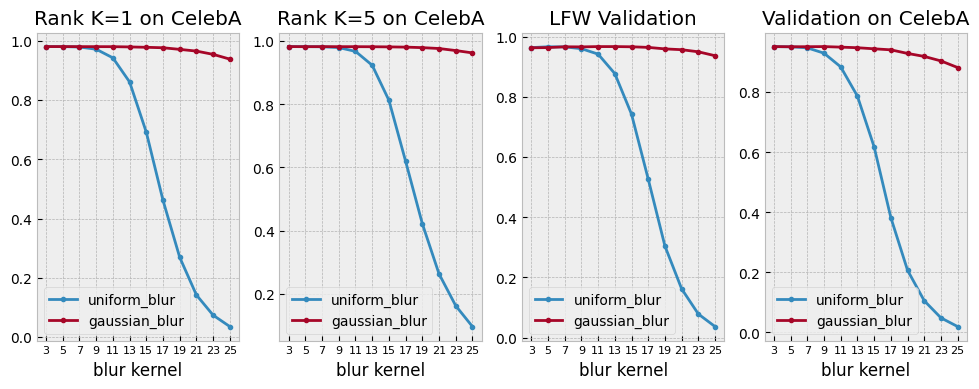

In [3]:
# looking at blurring results, comparing rank k on CelebA to lfw validation
fig, ax = plt.subplots(1, 4)

for privacy_mechanism in ["uniform_blur", "gaussian_blur"]:
    blur_kernels = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

    # having to find the actual number of entries in CelebA's test set
    celeba_paths = glob.glob("Datasets//CelebA//**//*.jpg", recursive=True)
    rank_k_denominator = len(celeba_paths[182638:])

    zeros = [0 for _ in range(len(blur_kernels))]
    rank_k_accs, rank_k5_accs, val_accs, val2_accs = (
        copy(zeros),
        copy(zeros),
        copy(zeros),
        copy(zeros),
    )

    for i in range(len(blur_kernels)):
        kernel = blur_kernels[i]
        try:
            rank_k_accuracies = query_accuracy(
                "rank_k",
                dataset="CelebA",
                p_mech_suffix=f"{privacy_mechanism}_{kernel}",
                mode="mean",
                denominator=rank_k_denominator,
            )
            rank_k_accs[i] = rank_k_accuracies["1"]
            rank_k5_accs[i] = rank_k_accuracies["5"]
        except Exception:
            print(f"No data for {privacy_mechanism}_{kernel}.")

        try:
            val_acc = query_accuracy(
                "lfw_validation",
                dataset="lfw",
                p_mech_suffix=f"{privacy_mechanism}_{kernel}",
                mode="mean",
                denominator=3000,
            )
            val_accs[i] = val_acc
        except Exception:
            print(f"No data for {privacy_mechanism}_{kernel}.")

        try:
            val2_acc = query_accuracy(
                "validation",
                dataset="CelebA",
                p_mech_suffix=f"{privacy_mechanism}_{kernel}",
                mode="mean",
                denominator=5000,
            )
            val2_accs[i] = val2_acc
        except Exception:
            print(f"No data for {privacy_mechanism}_{kernel}.")

    ax[0].plot(blur_kernels, rank_k_accs, label=privacy_mechanism, marker=".")
    ax[1].plot(blur_kernels, rank_k5_accs, label=privacy_mechanism, marker=".")
    ax[2].plot(blur_kernels, val_accs, label=privacy_mechanism, marker=".")
    ax[3].plot(blur_kernels, val2_accs, label=privacy_mechanism, marker=".")

ax[0].set_title("Rank K=1 on CelebA")
ax[0].legend()
ax[1].set_title("Rank K=5 on CelebA")
ax[1].legend()
ax[2].set_title("LFW Validation")
ax[2].legend()
ax[3].set_title("Validation on CelebA")
ax[3].legend()

for i in range(4):
    ax[i].set_xticks(blur_kernels, labels=blur_kernels, fontsize=8)
    ax[i].set_xlabel("blur kernel")

plt.show()

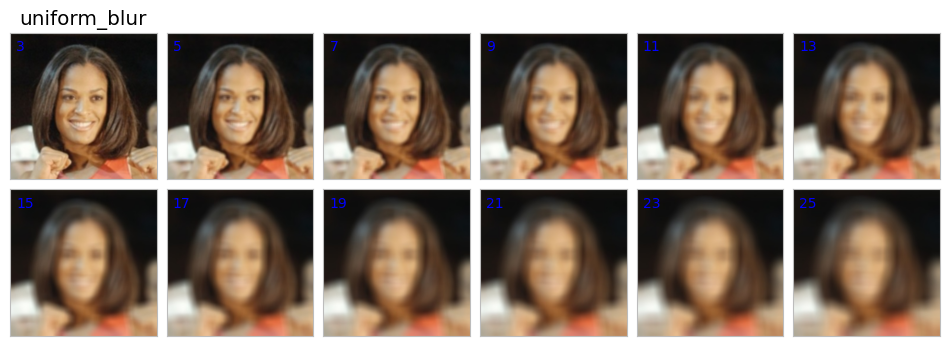

In [4]:
show_faces_of_condition(
    "uniform_blur", [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25], (2, 6), (12.0, 12.0)
)

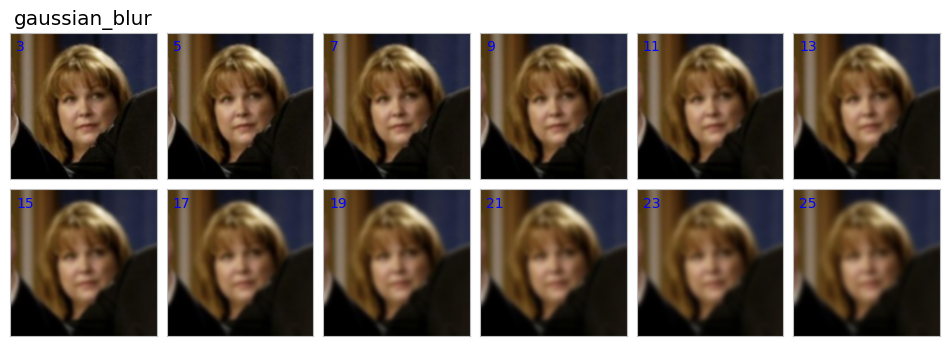

In [5]:
show_faces_of_condition(
    "gaussian_blur", [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25], (2, 6), (12.0, 12.0)
)

No data for pixel_dp_3.0_b4.
No data for pixel_dp_3.0_b4.
No data for pixel_dp_3.0_b4.
No data for pixel_dp_4.0_b4.
No data for pixel_dp_4.0_b4.
No data for pixel_dp_4.0_b4.
No data for pixel_dp_5.0_b4.
No data for pixel_dp_5.0_b4.
No data for pixel_dp_5.0_b4.
No data for pixel_dp_6.0_b4.
No data for pixel_dp_6.0_b4.
No data for pixel_dp_6.0_b4.
No data for pixel_dp_7.0_b4.
No data for pixel_dp_7.0_b4.
No data for pixel_dp_7.0_b4.
No data for pixel_dp_8.0_b4.
No data for pixel_dp_8.0_b4.
No data for pixel_dp_8.0_b4.
No data for pixel_dp_9.0_b4.
No data for pixel_dp_9.0_b4.
No data for pixel_dp_9.0_b4.
No data for pixel_dp_10.0_b4.
No data for pixel_dp_10.0_b4.
No data for pixel_dp_10.0_b4.
No data for pixel_dp_1.0_b8.
No data for pixel_dp_1.0_b8.
No data for pixel_dp_1.0_b8.
No data for pixel_dp_2.0_b8.
No data for pixel_dp_2.0_b8.
No data for pixel_dp_2.0_b8.
No data for pixel_dp_3.0_b8.
No data for pixel_dp_3.0_b8.
No data for pixel_dp_3.0_b8.
No data for pixel_dp_4.0_b8.
No data for

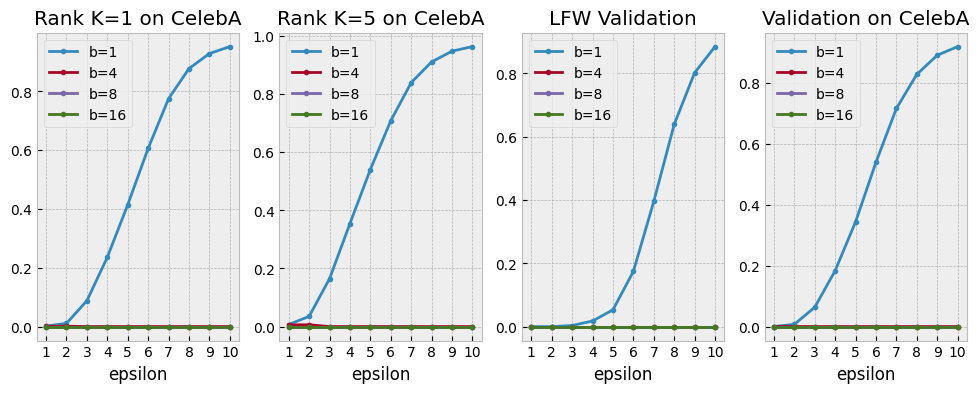

In [14]:
# look at pixel dp
fig, ax = plt.subplots(1, 4)

dp_epsilons = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# having to find the actual number of entries in CelebA's test set
celeba_paths = glob.glob("Datasets//CelebA//**//*.jpg", recursive=True)
rank_k_denominator = len(celeba_paths[182638:])

for b in [1, 4, 8, 16]:
    sufs = []
    for eps in dp_epsilons:
        sufs.append(f"{eps}_b{b}")

    zeros = [0 for _ in range(len(dp_epsilons))]
    rank_k_accs, rank_k5_accs, val_accs, val2_accs = (
        copy(zeros),
        copy(zeros),
        copy(zeros),
        copy(zeros),
    )

    for i in range(len(dp_epsilons)):
        eps = sufs[i]
        try:
            rank_k_accuracies = query_accuracy(
                "rank_k",
                dataset="CelebA",
                p_mech_suffix=f"pixel_dp_{eps}",
                mode="mean",
                denominator=rank_k_denominator,
            )
            rank_k_accs[i] = rank_k_accuracies["1"]
            rank_k5_accs[i] = rank_k_accuracies["5"]
        except Exception:
            print(f"No data for pixel_dp_{eps}.")

        try:
            val_acc = query_accuracy(
                "lfw_validation",
                dataset="lfw",
                p_mech_suffix=f"pixel_dp_{eps}",
                mode="mean",
                denominator=3000,
            )
            val_accs[i] = val_acc
        except Exception:
            print(f"No data for pixel_dp_{eps}.")

        try:
            val2_acc = query_accuracy(
                "validation",
                dataset="CelebA",
                p_mech_suffix=f"pixel_dp_{eps}",
                mode="mean",
                denominator=5000,
            )
            val2_accs[i] = val2_acc
        except Exception:
            print(f"No data for pixel_dp_{eps}.")

    ax[0].plot(dp_epsilons, rank_k_accs, label=f"b={b}", marker=".")
    ax[1].plot(dp_epsilons, rank_k5_accs, label=f"b={b}", marker=".")
    ax[2].plot(dp_epsilons, val_accs, label=f"b={b}", marker=".")
    ax[3].plot(dp_epsilons, val2_accs, label=f"b={b}", marker=".")

ax[0].set_title("Rank K=1 on CelebA")
ax[0].legend()
ax[1].set_title("Rank K=5 on CelebA")
ax[1].legend()
ax[2].set_title("LFW Validation")
ax[2].legend()
ax[3].set_title("Validation on CelebA")
ax[3].legend()

for i in range(4):
    ax[i].set_xticks(dp_epsilons)
    ax[i].set_xlabel("epsilon")

plt.show()

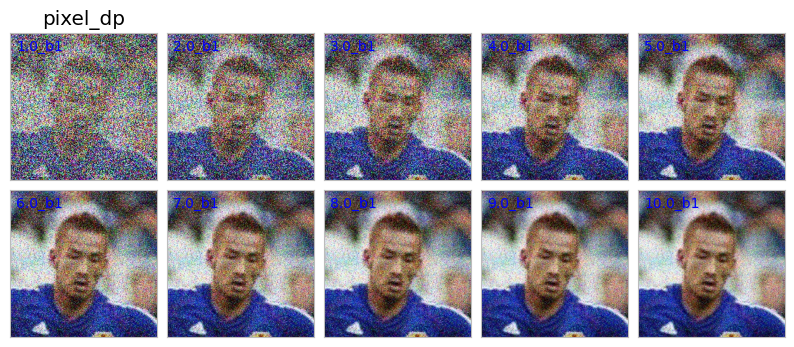

In [11]:
b = 1
sufs = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
for i in range(len(sufs)):
    sufs[i] = f"{sufs[i]}_b{b}"

show_faces_of_condition(
    "pixel_dp",
    sufs,
    (2, 5),
    (10.0, 10.0),
)